# Research Notebook

## 1. Make an input file
* In the same directory as this Jupyter notebook, there must be a template input file (the default name is qpinput_template.json) and two python files: mkQPinput.py and pyVisQP.py

* For the 'Units', if 'Normalized' is selected, then all the length will be in the normalized units, and the last box will be $n_{peak}/n_p$. If 'Experimental' is selected, then all the length will have the unit of $\mu m$, and the last box will be the total charge of the beam (in $nC$).

In [25]:
from importlib import reload
# import mkQPinput
# mkQPinput = reload(mkQPinput)
# mkQPinput.makeWidgetsForInput()
import mkQPinput_complicated
mkQPinput_complicated = reload(mkQPinput_complicated)
mkQPinput_complicated.makeWidgetsForInput()

interactive(children=(Text(value='qpinput_template.json', description='Template Input File:', layout=Layout(wi…

## 2. Run QuickPIC simulation

In [2]:
# Open a terminal and run the following lines (or something like that. For a large simulatoin, submit a batch script):
# salloc -N 1 -C haswell -q interactive -t 01:00:00
# srun -n 32 -c 2 --cpu_bind=cores qpic.initialDump.e

32


256

## 3. Visualize the output data
### 1. Plasma and beam density

In [28]:
from importlib import reload
import pyVisQP
pyVisQP = reload(pyVisQP)

dirname = '.'

# LineoutDir can be chosen from: None, 'transverse', 'longitudinal'

# Plot the charge density of plasma and beam
filename1 = dirname +'/Species0001/Charge_slice_0001/charge_slice_xz_00000041.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0001/charge_slice_xz_00000041.h5'
filename3 = dirname +'/Beam0002/Charge_slice_0001/charge_slice_xz_00000041.h5'
filenameList = [filename1,filename2,filename3]
scaleList = [1,1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

filename1 = dirname +'/Species0001/Charge_slice_0002/charge_slice_yz_00000001.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0002/charge_slice_yz_00000001.h5'
filename3 = dirname +'/Beam0002/Charge_slice_0002/charge_slice_yz_00000001.h5'
filenameList = [filename1,filename2,filename3]
scaleList = [1,1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

### 2. Accelerating field: $E_z$

In [10]:
# Plot the accelerating field with transverse lineout
filename = dirname +'/Fields/Ez_slice0001/ezslicexz_00000001.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'longitudinal',specify_title = '$E_z \; [mc\omega_p / e]$')
pyVisQP.makeplot(filenameList,LineoutDir = 'transverse',specify_title = '$E_z \; [mc\omega_p / e]$')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### 3. Focusing force

In [11]:
# Plot the x component of the focusing force : Fx with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Ex_slice0001/exslicexz_00000001.h5'
filename2 = dirname + '/Fields/By_slice0001/byslicexz_00000001.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

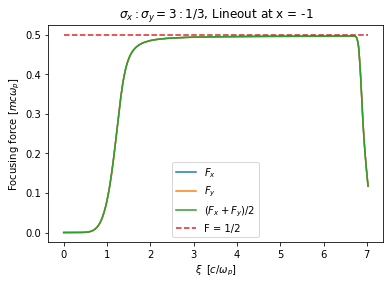

In [12]:
import matplotlib.pyplot as plt
# -Fx
filename_Ex_xz = './Fields/Ex_slice0001/exslicexz_00000001.h5'
filename_By_xz = './Fields/By_slice0001/byslicexz_00000001.h5'
lineout_Ex_xz = pyVisQP.getLineout(filename_Ex_xz,'longitudinal',227)
lineout_By_xz = pyVisQP.getLineout(filename_By_xz,'longitudinal',227)
lineout_Fx_xz = lineout_Ex_xz.copy()
lineout_Fx_xz[1] = -lineout_Ex_xz[1] + lineout_By_xz[1]

# -Fy
filename_Ey_yz = './Fields/Ey_slice0002/eysliceyz_00000001.h5'
filename_Bx_yz = './Fields/Bx_slice0002/bxsliceyz_00000001.h5'
lineout_Ey_yz = pyVisQP.getLineout(filename_Ey_yz,'longitudinal',227)
lineout_Bx_yz = pyVisQP.getLineout(filename_Bx_yz,'longitudinal',227)
lineout_Fy_yz = lineout_Ey_yz.copy()
lineout_Fy_yz[1] = -lineout_Ey_yz[1] - lineout_Bx_yz[1]
# -(Fx + Fy)/2
lineout_average = lineout_Fx_xz.copy()
lineout_average[1] = (lineout_Fx_xz[1] + lineout_Fy_yz[1])/2

# -1/2
x = lineout_average[0]
y = x * 0 + 1/2

plt.plot(lineout_Fx_xz[0],lineout_Fx_xz[1],label = '$F_x$')
plt.plot(lineout_Fy_yz[0],lineout_Fy_yz[1],label = '$F_y$')
plt.plot(lineout_average[0],lineout_average[1],label = '$(F_x + F_y)/2$')
plt.plot(x,y,'--',label='F = 1/2')

plt.xlabel(r'$\xi \;\; [c/\omega_p]$')
plt.ylabel(r'Focusing force $[mc\omega_p]$')
plt.title('$\sigma_x:\sigma_y= 3:1/3$, Lineout at x = -1')
plt.legend(loc='lower center')
plt.rcParams.update({'font.size': 12})

In [26]:
import beam_analysis
beam_analysis = reload(beam_analysis)
beam_analysis.chooseWhatToSee()

interactive(children=(IntSlider(value=0, description='center of data visualizatino region', max=3, min=-3), Fl…

### 4. Delete previous output data

In [13]:
import os 
os.system("rm -r Beam000*")
os.system("rm -r Species000*")
os.system("rm -r Fields")
os.system("rm -r ELOG")

0